In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
enrollment_df = pd.read_csv("../data/2017-18__-_2021-22_Demographic_Snapshot_20240410.csv")

In [3]:
enrollment_df.head(5)

,DBN,School Name,Year,Total Enrollment,Grade 3K,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,01M015,P.S. 015 Roberto Clemente,2017-18,190,0,17,28,32,33,23,...,0.032,0,0.0,49,0.258,8,0.042,161,84.7%,89.0%
1,01M015,P.S. 015 Roberto Clemente,2018-19,174,0,13,20,33,30,30,...,0.034,0,0.0,39,0.224,8,0.046,147,84.5%,88.8%
2,01M015,P.S. 015 Roberto Clemente,2019-20,190,0,14,29,28,38,33,...,0.047,0,0.0,46,0.242,17,0.089,155,81.6%,86.7%
3,01M015,P.S. 015 Roberto Clemente,2020-21,193,0,17,29,29,27,30,...,0.057,0,0.0,44,0.228,21,0.109,161,83.4%,86.4%
4,01M015,P.S. 015 Roberto Clemente,2021-22,179,0,15,30,26,24,22,...,0.067,0,0.0,38,0.212,11,0.061,150,83.8%,87.9%


In [4]:
enrollment_df = enrollment_df[enrollment_df['Year'].isin(['2020-21','2021-22'])]


In [5]:
enrollment_df.sample(5)

,DBN,School Name,Year,Total Enrollment,Grade 3K,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
2891,11X326,Bronx Green Middle School,2021-22,360,0,0,0,0,0,0,...,0.094,0,0.000,61,0.169,74,0.206,Above 95%,Above 95%,86.6%
4406,19K013,P.S. 013 Roberto Clemente,2021-22,378,21,35,54,50,52,53,...,0.032,0,0.000,88,0.233,23,0.061,342,90.5%,90.9%
4321,18K563,It Takes a Village Academy,2021-22,372,0,0,0,0,0,0,...,0.043,5,0.013,85,0.228,68,0.183,260,69.9%,75.4%
8913,84X345,Hyde Leadership Charter School,2021-22,936,0,0,52,69,74,76,...,0.006,22,0.024,229,0.245,161,0.172,876,93.6%,88.6%
4605,19K662,Liberty Avenue Middle School,2020-21,533,0,0,0,0,0,0,...,0.011,0,0.000,136,0.255,96,0.180,Above 95%,Above 95%,88.7%


In [6]:
enrollment_df.columns

Index(['DBN', 'School Name', 'Year', 'Total Enrollment', 'Grade 3K',
       'Grade PK (Half Day & Full Day)', 'Grade K', 'Grade 1', 'Grade 2',
       'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8',
       'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', '# Female', '% Female',
       '# Male', '% Male', '# Asian', '% Asian', '# Black', '% Black',
       '# Hispanic', '% Hispanic', '# Multi-Racial', '% Multi-Racial',
       '# Native American', '% Native American', '# White', '% White',
       '# Missing Race/Ethnicity Data', '% Missing Race/Ethnicity Data',
       '# Students with Disabilities', '% Students with Disabilities',
       '# English Language Learners', '% English Language Learners',
       '# Poverty', '% Poverty', 'Economic Need Index'],
      dtype='object')

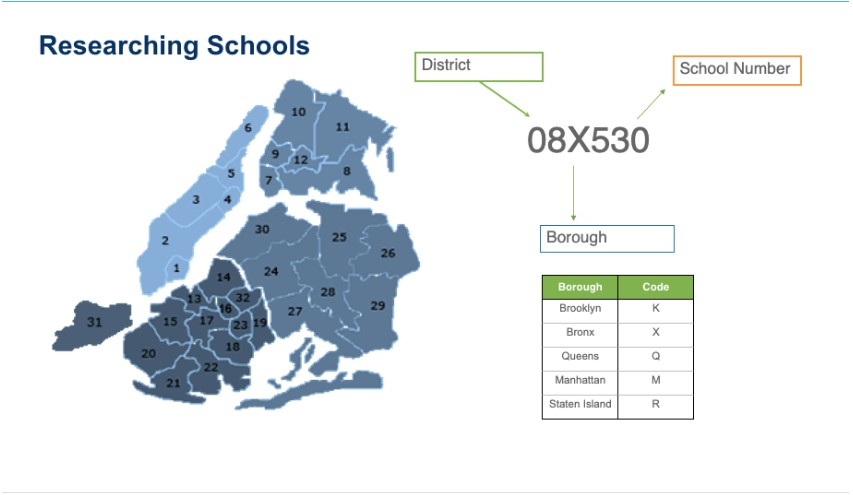

In [7]:
enrollment_df[['DBN','Year', 'Total Enrollment','# Female', '% Female', '# Male', '% Male','# Poverty', '% Poverty', 'Economic Need Index']]

,DBN,Year,Total Enrollment,# Female,% Female,# Male,% Male,# Poverty,% Poverty,Economic Need Index
3,01M015,2020-21,193,101,0.523,92,0.477,161,83.4%,86.4%
4,01M015,2021-22,179,96,0.536,83,0.464,150,83.8%,87.9%
8,01M019,2020-21,212,99,0.467,113,0.533,152,71.7%,69.6%
9,01M019,2021-22,176,83,0.472,93,0.528,124,70.5%,67.8%
13,01M020,2020-21,412,201,0.488,211,0.512,297,72.1%,77.0%
...,...,...,...,...,...,...,...,...,...,...
9240,84X717,2021-22,314,173,0.551,141,0.449,264,84.1%,84.8%
9244,84X718,2020-21,570,298,0.523,272,0.477,469,82.3%,63.9%
9245,84X718,2021-22,572,295,0.516,277,0.484,458,80.1%,63.1%
9249,84X730,2020-21,626,340,0.543,286,0.457,547,87.4%,88.9%


In [8]:
attendance_df = pd.read_csv('../data/2018-2021_Daily_Attendance_by_School_20240410.csv')

In [9]:
attendance_df.sample(5)

,School DBN,Date,SchoolYear,Enrolled,Present,Absent,Released
678002,27Q260,2021-03-02T00:00:00.000,20202021,244.0,140.0,104.0,0.0
190624,31R020,10/11/2019,20192020,424.0,391.0,33.0,0.0
30818,17K340,10/17/2019,20192020,197.0,190.0,7.0,0.0
92715,23K327,12/19/2018,20182019,302.0,279.0,23.0,0.0
22175,05M285,06/07/2019,20182019,180.0,74.0,105.0,1.0


In [10]:
attendance_df.rename(columns={'School DBN':'DBN'}, inplace=True)

In [11]:
attendance_df.sample(10)

,DBN,Date,SchoolYear,Enrolled,Present,Absent,Released
164270,12X536,02/05/2020,20192020,393.0,374.0,19.0,0.0
561084,11X544,2021-01-28T00:00:00.000,20202021,319.0,261.0,58.0,0.0
335864,12X271,04/10/2019,20182019,668.0,597.0,71.0,0.0
649473,24Q068,2021-02-24T00:00:00.000,20202021,480.0,461.0,19.0,0.0
701324,30Q084,2021-05-12T00:00:00.000,20202021,270.0,255.0,15.0,0.0
643583,23K165,2021-05-27T00:00:00.000,20202021,233.0,207.0,26.0,0.0
217795,02M089,12/07/2018,20182019,456.0,439.0,17.0,0.0
688968,28Q332,2020-11-16T00:00:00.000,20202021,278.0,216.0,62.0,0.0
469360,02M298,2020-12-23T00:00:00.000,20202021,585.0,365.0,220.0,0.0
326750,20K192,10/30/2018,20182019,645.0,623.0,22.0,0.0


In [12]:
attendance_df['Date'].unique()

array(['09/05/2018', '09/06/2018', '09/07/2018', '09/12/2018',
       '09/13/2018', '09/14/2018', '09/17/2018', '09/18/2018',
       '09/20/2018', '09/21/2018', '09/24/2018', '09/25/2018',
       '09/26/2018', '09/27/2018', '09/28/2018', '10/01/2018',
       '10/02/2018', '10/03/2018', '10/04/2018', '10/05/2018',
       '10/09/2018', '10/10/2018', '10/11/2018', '10/12/2018',
       '10/15/2018', '10/16/2018', '10/17/2018', '10/18/2018',
       '10/19/2018', '10/22/2018', '10/23/2018', '10/24/2018',
       '10/25/2018', '10/26/2018', '11/27/2018', '11/28/2018',
       '11/29/2018', '11/30/2018', '12/03/2018', '12/04/2018',
       '12/05/2018', '12/06/2018', '12/07/2018', '12/10/2018',
       '12/11/2018', '12/12/2018', '12/13/2018', '12/14/2018',
       '12/17/2018', '12/18/2018', '12/19/2018', '12/20/2018',
       '12/21/2018', '01/02/2019', '01/03/2019', '01/04/2019',
       '01/09/2019', '01/10/2019', '01/11/2019', '01/14/2019',
       '01/15/2019', '01/16/2019', '01/17/2019', '01/18

In [13]:
attendance_df['Date'] = attendance_df['Date'].str.split('T').str[0]
# splitting "Time" 'T00:00:00.000' to only have the date

attendance_df['Date'].unique()

array(['09/05/2018', '09/06/2018', '09/07/2018', '09/12/2018',
       '09/13/2018', '09/14/2018', '09/17/2018', '09/18/2018',
       '09/20/2018', '09/21/2018', '09/24/2018', '09/25/2018',
       '09/26/2018', '09/27/2018', '09/28/2018', '10/01/2018',
       '10/02/2018', '10/03/2018', '10/04/2018', '10/05/2018',
       '10/09/2018', '10/10/2018', '10/11/2018', '10/12/2018',
       '10/15/2018', '10/16/2018', '10/17/2018', '10/18/2018',
       '10/19/2018', '10/22/2018', '10/23/2018', '10/24/2018',
       '10/25/2018', '10/26/2018', '11/27/2018', '11/28/2018',
       '11/29/2018', '11/30/2018', '12/03/2018', '12/04/2018',
       '12/05/2018', '12/06/2018', '12/07/2018', '12/10/2018',
       '12/11/2018', '12/12/2018', '12/13/2018', '12/14/2018',
       '12/17/2018', '12/18/2018', '12/19/2018', '12/20/2018',
       '12/21/2018', '01/02/2019', '01/03/2019', '01/04/2019',
       '01/09/2019', '01/10/2019', '01/11/2019', '01/14/2019',
       '01/15/2019', '01/16/2019', '01/17/2019', '01/18

In [14]:
attendance_df['Date'].sample(10)

305966    09/10/2019
289673    02/10/2020
88406     11/15/2018
46198     11/05/2018
536889    2020-11-16
151152    10/18/2018
470697    2020-09-18
684258    2020-12-09
102525    12/17/2019
615006    2021-03-09
Name: Date, dtype: object

In [20]:
attendance_df['Date'] = attendance_df['Date'].apply(parse_date)

attendance_df['Date']

0         2018-09-05
1         2018-09-06
2         2018-09-07
3         2018-09-12
4         2018-09-13
             ...    
736573           NaT
736574           NaT
736575           NaT
736576           NaT
736577           NaT
Name: Date, Length: 736578, dtype: object

In [17]:
#attendance_df['Date'] = pd.to_datetime(attendance_df['Date'], errors='coerce')
#attendance_df['Date'] = attendance_df['Date'].dt.strftime('%Y-%m-%d')
#attendance_df['Date']

0         2018-09-05
1         2018-09-06
2         2018-09-07
3         2018-09-12
4         2018-09-13
             ...    
736573           NaN
736574           NaN
736575           NaN
736576           NaN
736577           NaN
Name: Date, Length: 736578, dtype: object

In [18]:
attendance_df[attendance_df['Date'].isna()]

,DBN,Date,SchoolYear,Enrolled,Present,Absent,Released
456170,01M015,NaN,20202021,183.0,148.0,35.0,0.0
456171,01M015,NaN,20202021,183.0,144.0,39.0,0.0
456172,01M015,NaN,20202021,185.0,152.0,33.0,0.0
456173,01M015,NaN,20202021,186.0,151.0,35.0,0.0
456174,01M015,NaN,20202021,186.0,155.0,31.0,0.0
...,...,...,...,...,...,...,...
736573,75X811,NaN,20202021,637.0,470.0,161.0,6.0
736574,75X811,NaN,20202021,633.0,440.0,164.0,29.0
736575,75X811,NaN,20202021,633.0,434.0,170.0,29.0
736576,75X811,NaN,20202021,633.0,427.0,176.0,30.0
